In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
from matplotlib import cm
from matplotlib import colors

In [17]:
url ='https://raw.githubusercontent.com/utn-frocha/datos/main/encuesta_aeropuerto.csv'
df = pd.read_csv(url)


In [ ]:
df.dtypes

In [4]:
print(df.head())
print("<<<<------------------------------------------------------->>>>")
print(df.info())
print("<<<<------------------------------------------------------->>>>")
print(df.isnull().sum())
print("<<<<------------------------------------------------------->>>>")
print(df.describe())

       id  Gender      Customer Type  Age   Type of Travel     Class  \
0   70172    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1    5047    Male  disloyal Customer   25  Business travel  Business   
2  110028  Female     Loyal Customer   26  Business travel  Business   
3   24026  Female     Loyal Customer   25  Business travel  Business   
4  119299    Male     Loyal Customer   61  Business travel  Business   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              460                      3                                  4   
1              235                      3                                  2   
2             1142                      2                                  2   
3              562                      2                                  5   
4              214                      3                                  3   

   Ease of Online booking  ...  Inflight entertainment  On-board service  \
0         

In [5]:
print(df.isnull().sum(axis = 0))


id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64


In [ ]:
grupo=df.iloc[1:,1:6]
print(grupo.head(10))

In [6]:
#df.groupby(by = "Type of Travel").count()

agrupacion=pd.DataFrame(df)
agrupacion.groupby(by = "Type of Travel").mean().round()

<ipython-input-6-2899f5ff033a>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agrupacion.groupby(by = "Type of Travel").mean().round()


,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Type of Travel,,,,,,,,,,,,,,,,,,,
Business travel,64964.0,40.0,1368.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,15.0,15.0
Personal Travel,64888.0,38.0,793.0,3.0,4.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,14.0,15.0


In [7]:
#print(df['Class'].unique())
df['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [ ]:
promedio_edad =round( df['Age'].mean())
print(f' la edad promedio de los pacientes es de : {promedio_edad}')

 la edad promedio de los pacientes es de : 39


In [18]:
df.replace({
    'Gender': {
        'Male': 0,
        'Female': 1
    }
}, inplace=True)

In [10]:
df = pd.get_dummies(
    df,
    columns=['Type of Travel', 'Customer Type'],
    drop_first=True
)

In [11]:
display(df)

,id,Gender,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Type of Travel_Personal Travel,Customer Type_disloyal Customer
0,70172,0,13,Eco Plus,460,3,4,3,1,5,...,3,4,4,5,5,25,18.0,neutral or dissatisfied,1,0
1,5047,0,25,Business,235,3,2,3,3,1,...,5,3,1,4,1,1,6.0,neutral or dissatisfied,0,1
2,110028,1,26,Business,1142,2,2,2,2,5,...,3,4,4,4,5,0,0.0,satisfied,0,0
3,24026,1,25,Business,562,2,5,5,5,2,...,5,3,1,4,2,11,9.0,neutral or dissatisfied,0,0
4,119299,0,61,Business,214,3,3,3,3,4,...,4,4,3,3,3,0,0.0,satisfied,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,78463,0,34,Business,526,3,3,3,1,4,...,2,4,4,5,4,0,0.0,neutral or dissatisfied,0,1
129876,71167,0,23,Business,646,4,4,4,4,4,...,5,5,5,5,4,0,0.0,satisfied,0,0
129877,37675,1,17,Eco,828,2,5,1,5,2,...,3,4,5,4,2,0,0.0,neutral or dissatisfied,1,0
129878,90086,0,14,Business,1127,3,3,3,3,4,...,2,5,4,5,4,0,0.0,satisfied,0,0


<Axes: xlabel='Gender', ylabel='Age'>

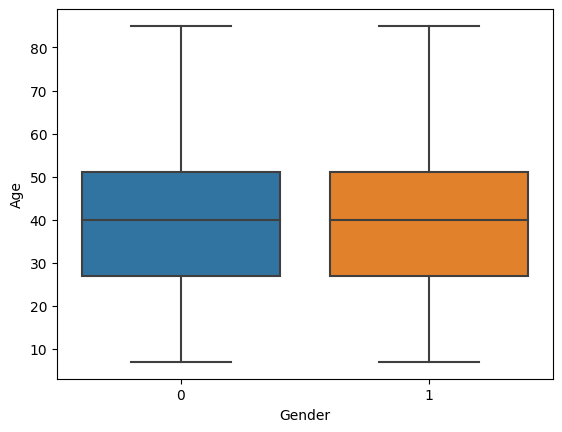

In [12]:
sns.boxplot(x = 'Gender', y = 'Age', data = df)

<Axes: >

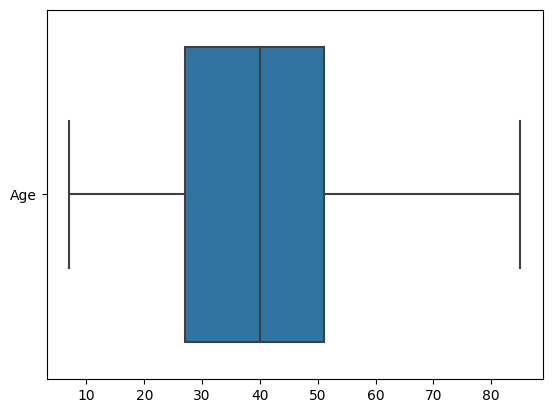

In [13]:
sns.boxplot(data=df[["Age"]], orient="h")

<Axes: xlabel='Class', ylabel='Age'>

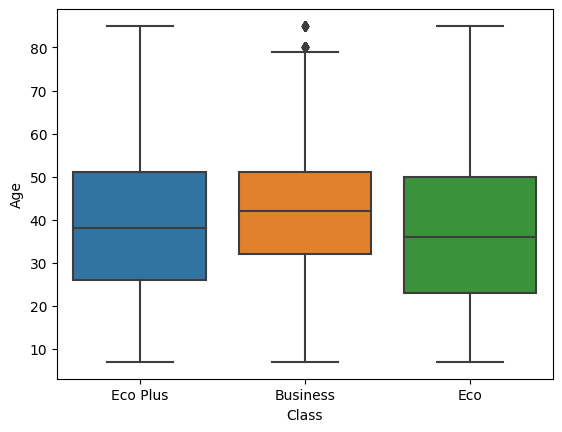

In [14]:
sns.boxplot(x = 'Class', y = 'Age', data = df)

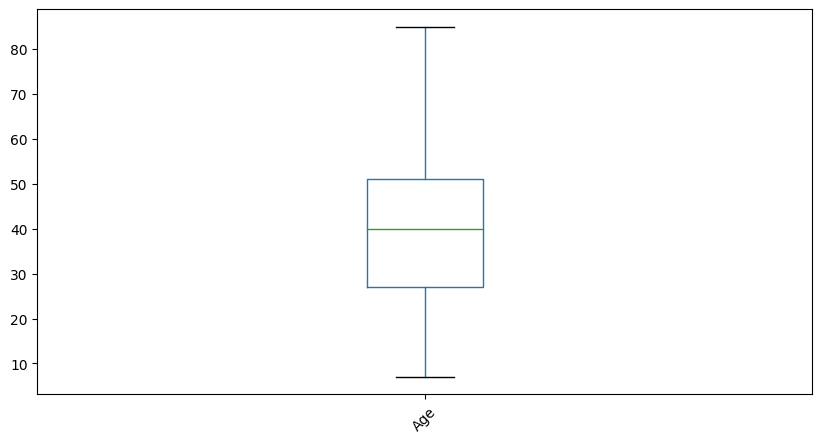

In [15]:
boxplot = df.boxplot(column=['Age'],grid=False, rot=45, fontsize=10 ,figsize=(10,5))

<AxesSubplot:>

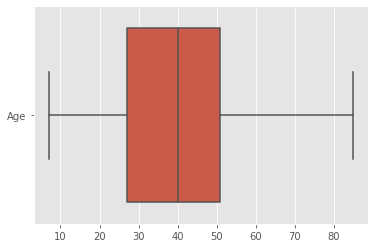

In [ ]:
sns.boxplot(data=df[["Age", "Class"]], orient="h")

<Axes: xlabel='Customer Type', ylabel='Age'>

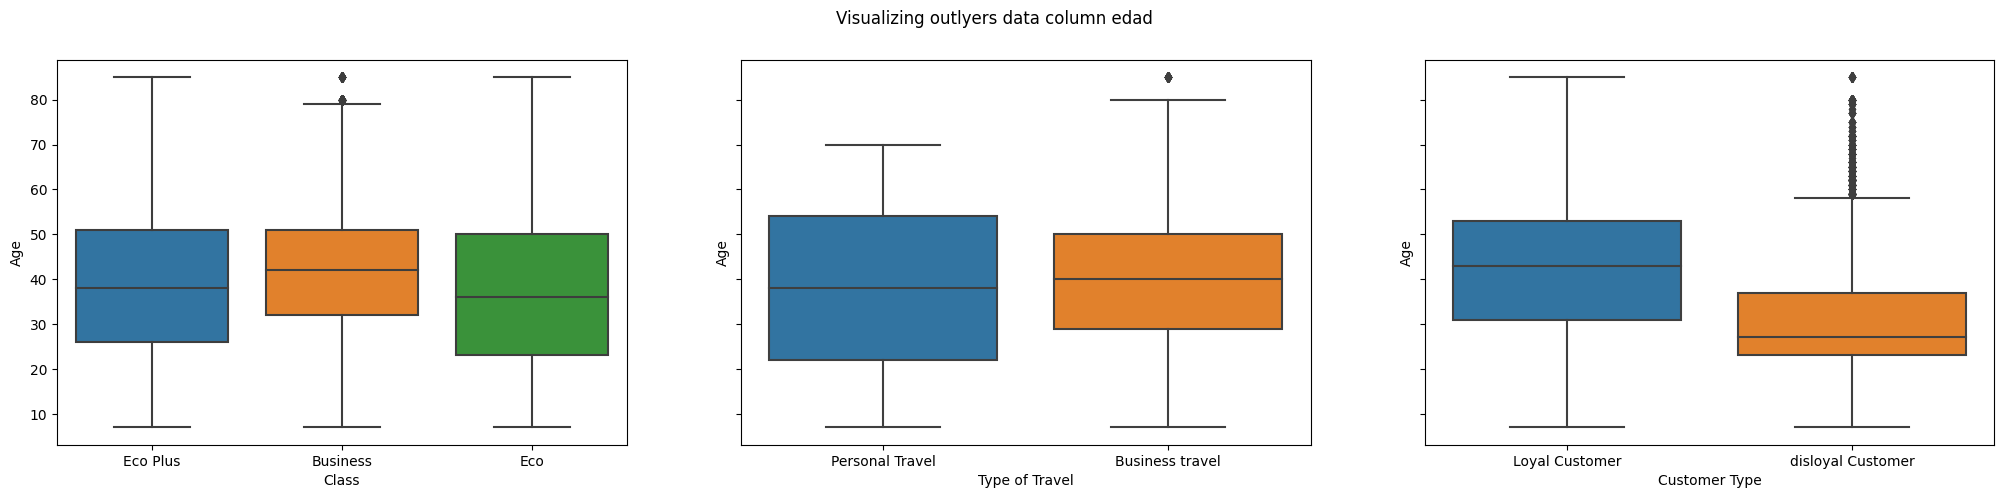

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(25, 5), sharey=True)
fig.suptitle('Visualizing outlyers data column edad')
sns.boxplot(x = 'Class', y = 'Age', data = df,ax=axes[0])
sns.boxplot(x = 'Type of Travel', y = 'Age', data = df,ax=axes[1])
sns.boxplot(x = 'Customer Type', y = 'Age', data = df,ax=axes[2])

<Axes: xlabel='Customer Type', ylabel='Flight Distance'>

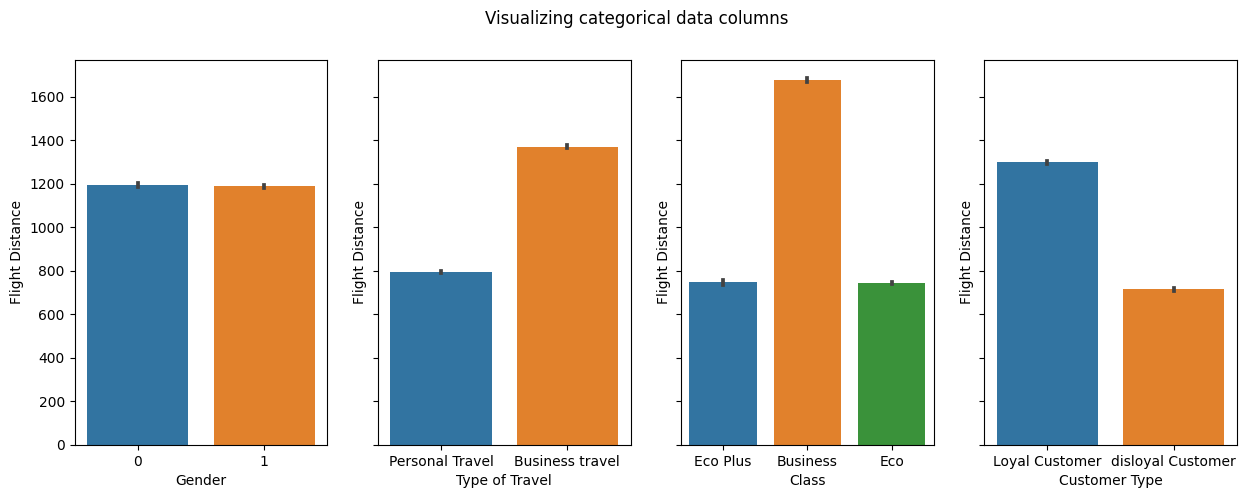

In [20]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True)
fig.suptitle('Visualizing categorical data columns')
sns.barplot(x=df['Gender'], y=df['Flight Distance'], ax=axes[0])
sns.barplot(x=df['Type of Travel'], y=df['Flight Distance'], ax=axes[1])
sns.barplot(x=df['Class'], y=df['Flight Distance'], ax=axes[2])
sns.barplot(x=df['Customer Type'], y=df['Flight Distance'], ax=axes[3])

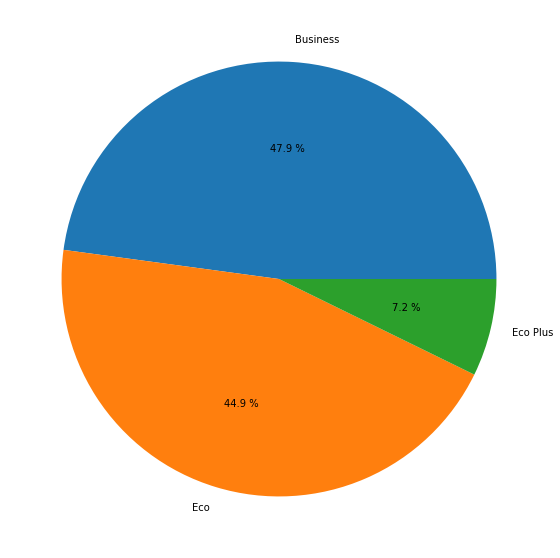

In [ ]:
fig = plt.figure(figsize=(25, 10))
datos = df.groupby('Class')['Class'].count()
datos=pd.DataFrame(datos)
datos = datos.rename(columns={'Class':'Total'})
dfi = datos.reset_index()

dfi.reset_index(drop=True, inplace=True)
dfi
plt.pie(dfi['Total'], labels=dfi['Class'], autopct="%0.1f %%")
plt.show()

In [ ]:
# Visualizamos histograma  de las caraterísticas de entrada
plt.rcParams["figure.figsize"] = (25, 25)
df.drop(['satisfaction', 'Class', 'Type of Travel','Customer Type','Gender','id'],1).hist()
plt.show( )

In [ ]:
# Usando matplotlib
plt.figure(figsize=(25, 15))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation between the columns")
plt.show()

In [ ]:
plt.figure(figsize=(25, 15))
df_cor=df.drop(['id'], axis=1)
sns.heatmap(df_cor.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation between the columns")
plt.show()


In [ ]:
fig = plt.figure(figsize=(25,10))
x = df['Inflight wifi service']
y = df['Food and drink']
z = df['Arrival Delay in Minutes']
ax = Axes3D(fig)
ax.scatter(x, y, z, c=z, marker='o')
ax.set_xlabel('Inflight wifi service')
ax.set_ylabel('Food and drink')
ax.set_zlabel('Arrival Delay in Minutes')
plt.title('Grafica tridimencional usando SEABORN')
ax.scatter(x, y, z, c="red")
plt.show()